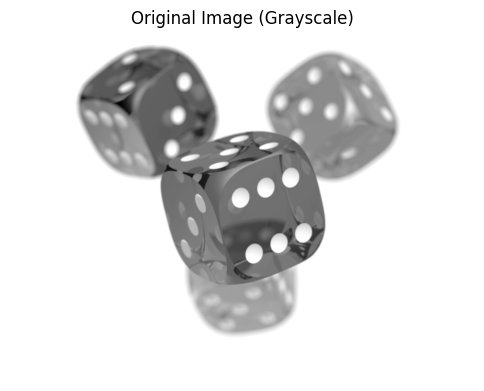

U shape: (600, 600), S shape: (600,), VT shape: (600, 800)


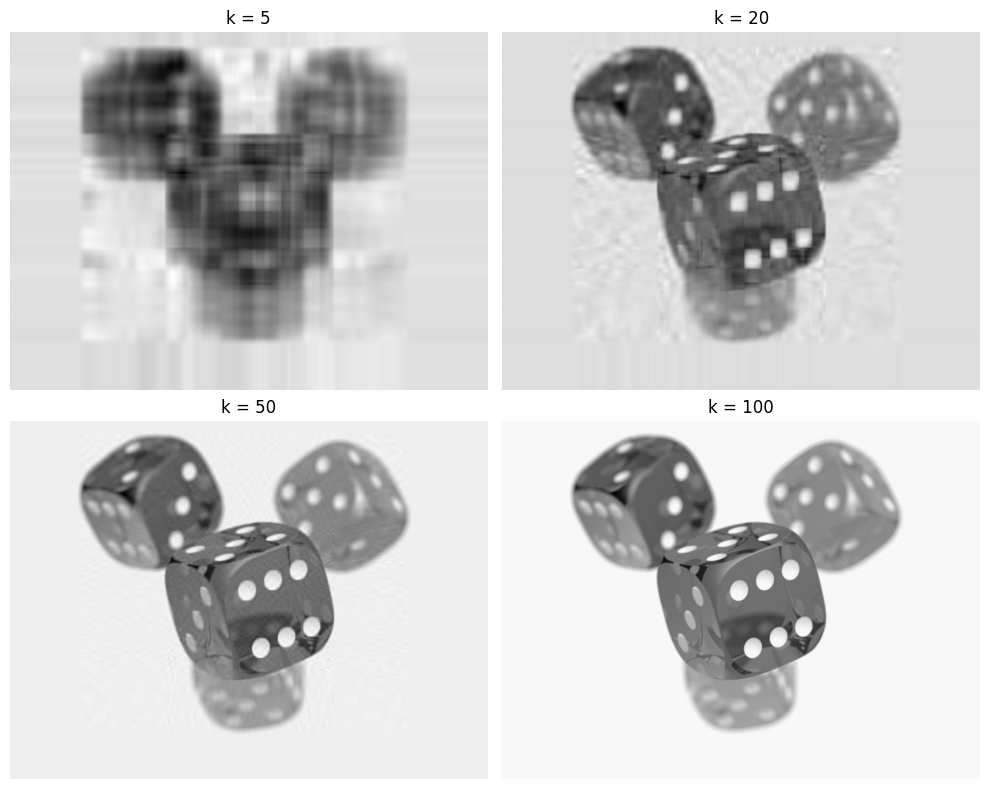

Compression Results:
k = 5: Compression Ratio = 68.52, Reconstruction Error = 52.89
k = 20: Compression Ratio = 17.13, Reconstruction Error = 18.89
k = 50: Compression Ratio = 6.85, Reconstruction Error = 6.66
k = 100: Compression Ratio = 3.43, Reconstruction Error = 2.19


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

image = io.imread('https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png')


if image.shape[2] == 4:  
    image = color.rgba2rgb(image)


gray_image = color.rgb2gray(image)


plt.figure(figsize=(6, 6))
plt.title("Original Image (Grayscale)")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()


U, S, VT = np.linalg.svd(gray_image, full_matrices=False)
print(f"U shape: {U.shape}, S shape: {S.shape}, VT shape: {VT.shape}")


def compress_image(U, S, VT, k):
    """使用前 k 个奇异值重构图像"""
    compressed_image = np.dot(U[:, :k], np.dot(np.diag(S[:k]), VT[:k, :]))
    return compressed_image


k_values = [5, 20, 50, 100]  
plt.figure(figsize=(10, 8))
for i, k in enumerate(k_values, 1):
    compressed_image = compress_image(U, S, VT, k)
    plt.subplot(2, 2, i)
    plt.imshow(compressed_image, cmap='gray')
    plt.title(f"k = {k}")
    plt.axis('off')

plt.tight_layout()
plt.show()


original_size = gray_image.size
print("Compression Results:")
for k in k_values:
    compressed_size = U[:, :k].size + k + VT[:k, :].size
    compression_ratio = original_size / compressed_size
    compressed_image = compress_image(U, S, VT, k)
    reconstruction_error = np.linalg.norm(gray_image - compressed_image)
    print(f"k = {k}: Compression Ratio = {compression_ratio:.2f}, Reconstruction Error = {reconstruction_error:.2f}")
